# Classes and data generation

Classes can be manipulated in very different ways. This is very useful when handling data from different source with different properties.

Here an example on how to generate data in classes, and work on the data directly via their classes. 

### Exercise: make a 2D random data plot and one with noise around a linear function

### My solution

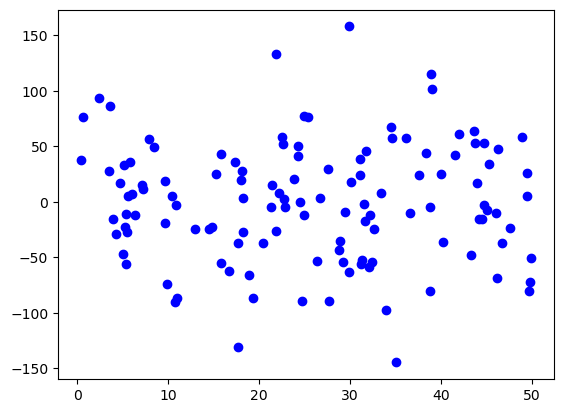

In [1]:
# Random 2D data 

import numpy as np
import matplotlib.pyplot as plt

n_random_points = 123
noise = 50
x = np.random.rand(n_random_points) * noise 

# Add noise
y = np.random.randn(n_random_points) * noise 

# Plot all
plt.scatter(x, y, color='blue', label='Data Points')
plt.show()


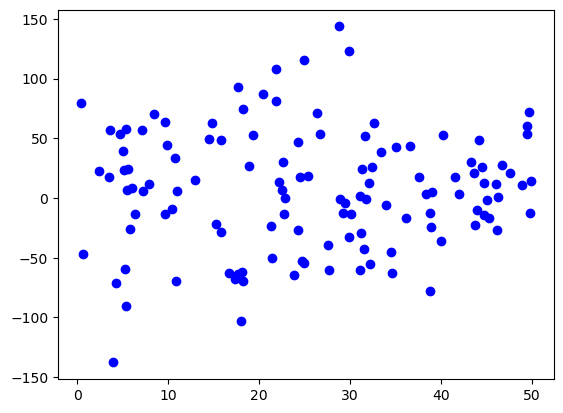

In [2]:
# 2D data around a line
import numpy as np
import matplotlib.pyplot as plt

n_random_points = 123
noise = 50

# Make 'perfect' data
true_slope,  true_intercept = 0, 5
y = true_slope * x + true_intercept

# Add noise
y += np.random.randn(n_random_points) * noise 

# Plot all
plt.scatter(x, y, color='blue', label='Data Points')
plt.show()


### Exercise: Let's make it more pythonic, part 1: into fuction



#### My solution

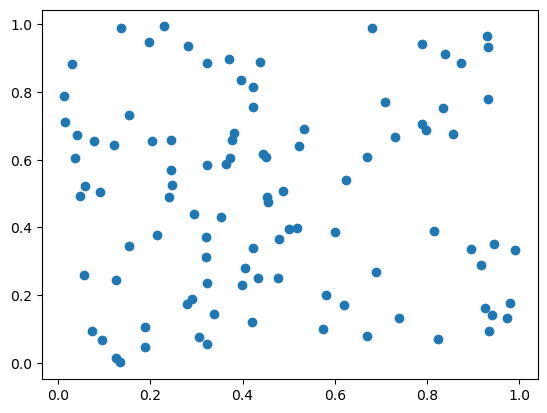

In [3]:
def generate_2d_data(n_random_points, noise=16):
    # Generate some sample data
    data = np.random.rand(100, 2)  # 100 data points with 2 features
    return data[:, 0], data[:, 1]

x, y = generate_2d_data(n_random_points=100, noise= 123)

plt.scatter(x, y)
plt.show()


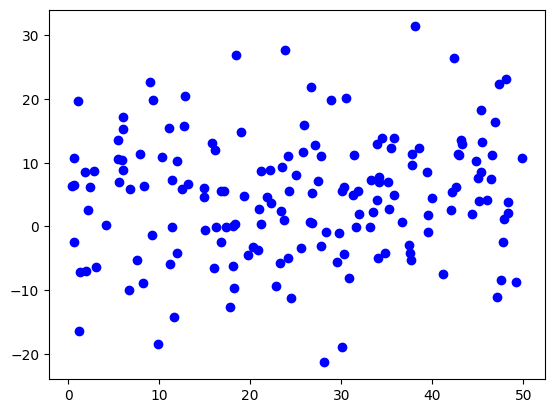

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_linear_data(n_random_points, noise=16):
    x = np.random.rand(n_random_points) * 50 

    # Make 'perfect' data
    true_slope,  true_intercept = 0, 5
    y = true_slope * x + true_intercept
    
    # Add noise
    y += np.random.randn(n_random_points)*noise 
    
    return x, y, true_slope, true_intercept

# Use the function to generate data
x, y, true_slope, true_intercept = generate_linear_data(
        n_random_points=166, noise=10)

# Plot all
plt.scatter(x, y, color='blue', label='Data Points')
plt.show()


### Exercise: Let's be even more pythonic now, keep the data and the functions inside a class

### My solution

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def generate_2d_data(n_random_points, noise=16):
    # Generate some sample data
    data = np.random.rand(100, 2)  # 100 data points with 2 features
    return  data[:, 0], data[:, 1]

class Data_generator():
    def __init__(self, description='Data generator', dimensions=2, n_points=100, noise=16):
        self.description = description
        self.dimensions = dimensions
        self.n_poiunts = n_points
        self.noise = noise
        self.data = None
    
    def generate_data(self):
        if self.dimensions == 2:
            self.data = generate_2d_data(self.n_poiunts, self.noise)
            
    def __add__(self, data_class):
        return np.append(self.data[0], data_class.data[0]), np.append(self.data[1], data_class.data[1])

    def __str__(self):
        return f'Class {self.description} for {self.dimensions}D data' 

        

In [26]:
myclass = Data_generator()
myclass2 = Data_generator() 

myclass.generate_data()
myclass2.generate_data()
print(myclass)

Class Data generator for 2D data


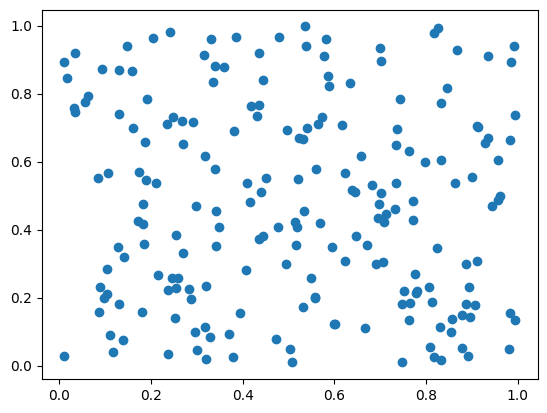

In [27]:
# Summing classes
x, y = myclass + myclass2

plt.scatter(x, y)
plt.show()

### Exercise: Add different data coming from different distributions

### My solution

In [133]:
# Let's expand the function capabilities!

import numpy as np
import matplotlib.pyplot as plt


def generate_2d_data(n_random_points, range=[1, 666], distribution = 'normal'):
    # Generate some sample data
    if distribution == 'normal':
        mu = (range[1] - range[0]/2) + range[0]
        std = (range[1] - range[0])/3
        x = np.random.normal(mu, std, n_random_points) + range[0]
        y = np.random.normal(mu, std, n_random_points) + range[0]
        
    else: 
        data = np.random.rand(n_random_points, 2) * (range[1] - range[0]) + range[0] # 100 data points with 2 features
        x = data[:, 0] 
        y = data[:, 1] 
    
    return  x, y

class Data_generator():
    def __init__(self, description='Data generator', dimensions=2, n_points=100, range=[1, 666]):
        self.description = description
        self.dimensions = dimensions
        self.n_points = n_points
        self.range = range
        self.data = None
    
    def generate_data(self):
        if self.dimensions == 2:
            self.data = generate_2d_data(n_random_points=self.n_points, range=self.range)
            
    def __add__(self, data_class):
        return np.append(self.data[0], data_class.data[0]), np.append(self.data[1], data_class.data[1])

    def __str__(self):
        return f'Class {self.description} for {self.dimensions}D data' 

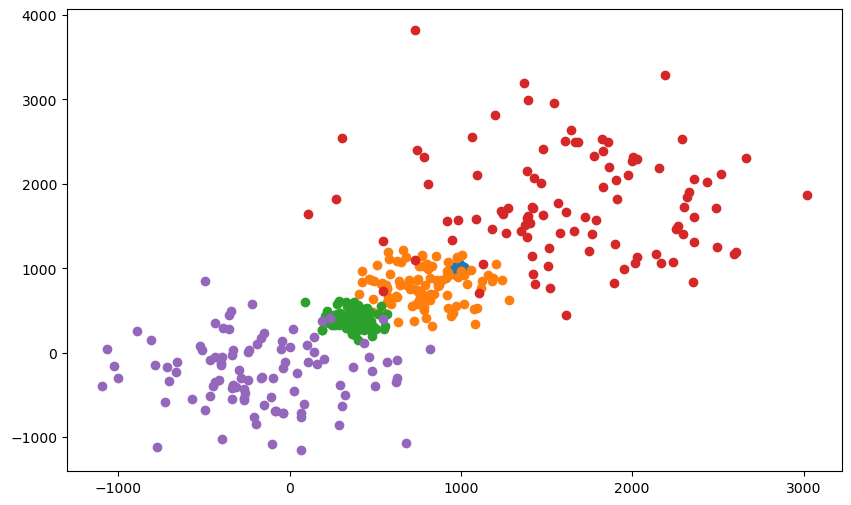

In [134]:
myclass0 = Data_generator(n_points=100, range=[366, 433])
myclass1 = Data_generator(n_points=100, range=[66, 666])
myclass2 = Data_generator(n_points=100, range=[33, 333])
myclass3 = Data_generator(n_points=100, range=[1, 1666])
myclass4 = Data_generator(n_points=100, range=[-555, 666])


plt.figure(figsize=(10,6))

for i_class in myclass0, myclass1, myclass2, myclass3, myclass4:
    i_class.generate_data()
    plt.scatter(i_class.data[0], i_class.data[1])
           
plt.show() 

### Exercise: add a function to the class such to generate linear data and sum then a class with random data

### My solution

In [3]:
# Let's expand the function capabilities!

import numpy as np
import matplotlib.pyplot as plt

 
def generate_2d_data(n_random_points, noise=16, range=[1, 666], true_slope = 0, true_intercept = 12):
    
    x = np.random.rand(n_random_points) * (range[1] - range[0]) + range[0]

    # Make 'perfect' data 
    y = true_slope * x + true_intercept
    
    # Add noise
    y += np.random.randn(n_random_points) * noise 
    
    return x, y
    
    
class Data_generator():
    def __init__(self, description='Data generator', dimensions=2, n_points=100, 
                 noise=16, range=[1, 666], true_slope = 0, true_intercept = 12):
        self.description = description
        self.dimensions = dimensions
        self.n_poiunts = n_points
        self.noise = noise
        self.range = range
        self.data = None
    
    def generate_data(self):
        if self.dimensions == 2:
            self.data = generate_2d_data(self.n_poiunts, self.noise, self.range)
            
    def __add__(self, data_class):
        return np.append(self.data[0], data_class.data[0]), np.append(self.data[1], data_class.data[1])

    def __str__(self):
        return f'Class {self.description} for {self.dimensions}D data' 

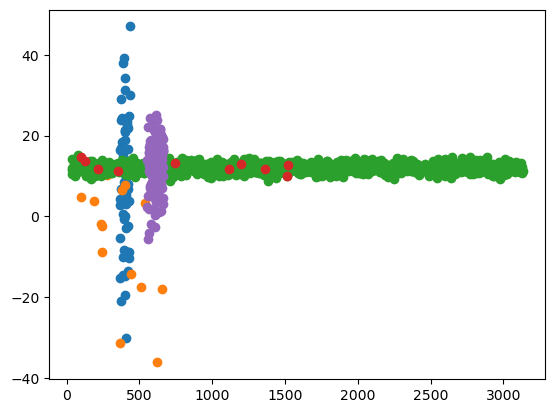

In [8]:
myclass0 = Data_generator(n_points=66, noise=16, range=[366, 433], true_slope = 10, true_intercept = 112)
myclass1 = Data_generator(n_points=15, noise=23, range=[66, 666], true_slope = 140, true_intercept = 312)
myclass2 = Data_generator(n_points=1020, noise=1, range=[33, 3133], true_slope = 320, true_intercept = 212)
myclass3 = Data_generator(n_points=10, noise=1, range=[1, 1666], true_slope = 240, true_intercept = 2)
myclass4 = Data_generator(n_points=143, noise=6, range=[555, 666], true_slope = 140, true_intercept = 112)


for i_class in myclass0, myclass1, myclass2, myclass3, myclass4:
    i_class.generate_data()
    plt.scatter(i_class.data[0], i_class.data[1])
       
plt.show() 

In [9]:
## NOTE: this last plot is clearly !! WRONG !! Fix it! :) 